# Part 1: Exploratory Data Analysis 

### Dataset: difficult_qa.csv 
This dataset contains expert-level questions from multiple domains such as Math, Computer 
Science, Biology, Physics and others. 

### Columns in the dataset: 
● id: Unique identifier for each question.  
● question: The question text (may include LaTeX code).   
● ground_truth_answer: The correct succinct answer (may include LaTeX code).   
● rationale: Reasoning behind the correct answer (may include LaTeX code).   
● raw_subject: Subject or topic.   
● category: Broad category of the question.  


### Loading and preparing data

In [ ]:
import pandas as pd

df = pd.read_csv("data\difficult_qa.csv")

print(df.head())


   id                                           question  \
0   0  Let \( T_n \) represent the number of ways to ...   
1   1  To date, how many members of the let-7 family ...   
2   2  In a quantum neural network architecture where...   
3   3  Let $f$ be a smooth compactly supported scalar...   
4   4  Consider the following nonlinear and nonlocal ...   

               ground_truth_answer  \
0                               12   
1                               15   
2                              0.4   
3  r^{A(1-\cos\theta)+B\sin\theta}   
4                $\frac{124}{27}$.   

                                           rationale          raw_subject  \
0  To find the recursive formula for \( T_n \), w...          Mathematics   
1  To date, 15 members of the let-7 family have b...              Biology   
2  1) Let's call the output state after applying ...              Physics   
3  The vector field $u$ is harmonic, so\n$$u = \n...  Applied Mathematics   
4  The term $u(1-u)^2$ in

### Top 50 Most Common Words in Questions (excluding stopwords and LaTeX code)

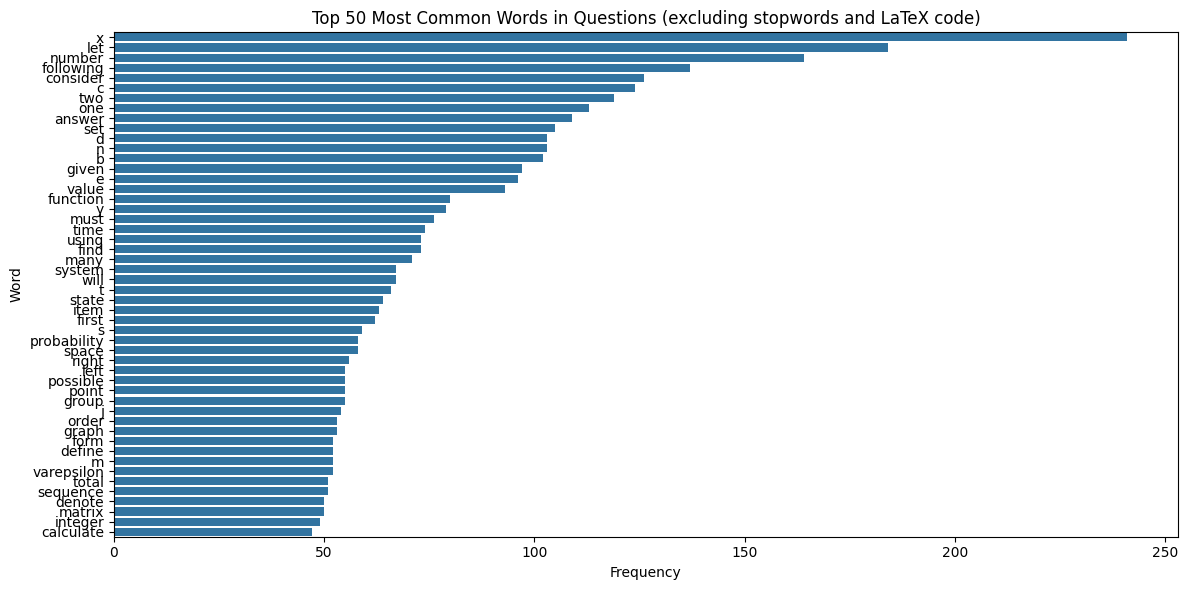

In [ ]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import seaborn as sns

def clean_LaTeX(text):
    text = re.sub(r'\$.*?\$', '', text)         
    text = re.sub(r'\\\(.*?\\\)', '', text)     
    text = re.sub(r'\\\[.*?\\\]', '', text)    
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()
    return text

stopwords = set(STOPWORDS)
text = " ".join([clean_LaTeX(q) for q in df['question']])
words = [word for word in text.split() if word not in stopwords]
word_counts = Counter(words).most_common(50)
word_df = pd.DataFrame(word_counts, columns=["word", "count"])

plt.figure(figsize=(12, 6))
sns.barplot(data=word_df, x="count", y="word")  
plt.title("Top 50 Most Common Words in Questions (excluding stopwords and LaTeX code)")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

~ Solution explanation: In essence, the Python code first defines a function to clean text by removing LaTeX mathematical expressions and non-alphabetic characters, converting everything to lowercase. It then processes a column of questions from a pandas DataFrame, removes common English stopwords, counts the frequency of the remaining words using Counter, and selects the top 50 most frequent. Finally, it uses seaborn and matplotlib to generate a horizontal bar plot visualizing these top 50 words and their frequencies. This type of graph was chosen to clearly display and compare the prevalence of different words within the questions, offering a straightforward way to identify the key vocabulary and likely topics of inquiry after filtering out noise like common words and mathematical notation, thus providing insight into the core content of the questions.

~ Interpretation: The bar chart displays the top 50 most frequent words found in a collection of questions, after removing common English stopwords and any LaTeX mathematical expressions. Each horizontal bar represents a unique word, and the length of the bar corresponds to the frequency of that word in the questions. The words are ordered vertically from the most frequent at the top to the 50th most frequent at the bottom. This visualization allows for a quick understanding of the prevalent vocabulary used in the questions, highlighting the key terms and concepts that are most often inquired about. For instance, words like "x", "let", "number", and "following" appear to be among the most common, suggesting a significant number of questions involving variables, definitions, and sequential information.

### Distribution of Rationale Length (length in number words)

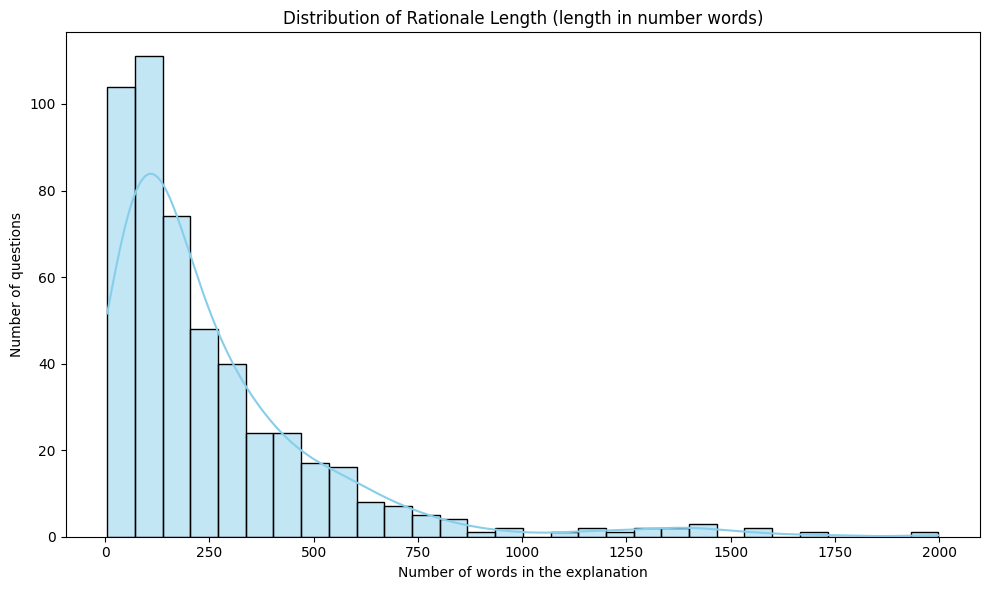

In [ ]:
df['rationale_word_count'] = df['rationale'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['rationale_word_count'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Rationale Length (length in number words)")
plt.xlabel("Number of words in the explanation")
plt.ylabel("Number of questions")
plt.tight_layout()
plt.show()

~ Solution explanation: The code counts how many words are in each explanation and saves that number. Then, it makes a histogram that shows how many explanations have a certain number of words. The smooth line helps see the general trend in explanation lengths. 

~ Interpretation: The graph shows us how long the explanations rationales are in terms of the number of words they contain. The horizontal axis tells you the number of words in an explanation, and the vertical axis tells you how many questions have explanations of that length. The bars show the counts for different ranges of word lengths, and the smooth curve gives us an idea of the general shape of the distribution. Looking at this graph, you can quickly see that most of the explanations are quite short, as the tallest bars are on the left side, lower word counts. As you move to the right, the bars get much shorter, indicating that longer explanations are less common. The curve also peaks at a lower word count and then gradually slopes down, reinforcing this observation. This kind of graph helps us understand the typical length of the reasoning provided for the questions in your dataset.

### Number of Questions per Category

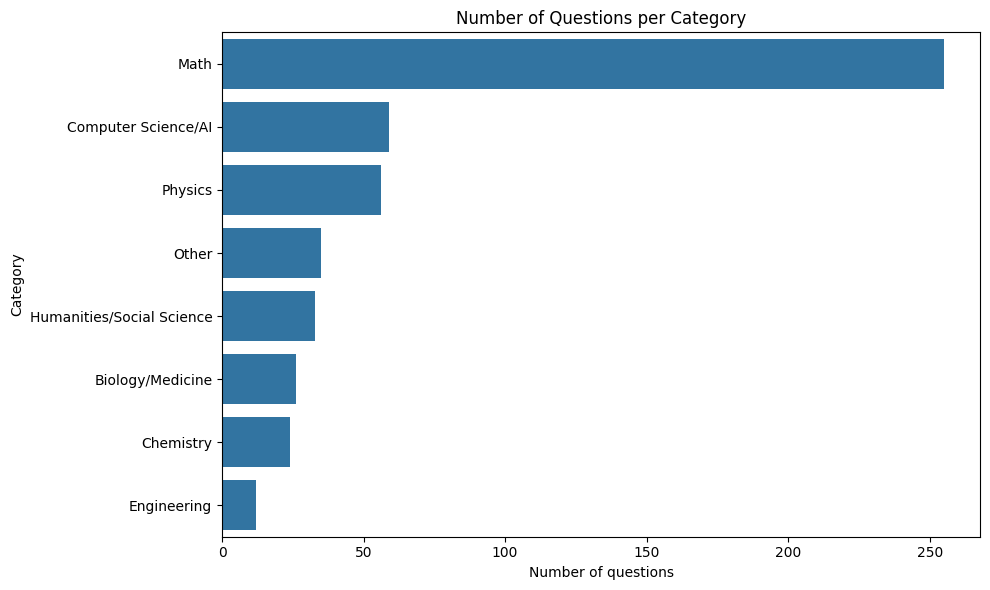

In [12]:
category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title("Number of Questions per Category")
plt.xlabel("Number of questions")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

~ Solution explanation: The code counts how many questions are in each category. Then, it draws a horizontal bar chart where longer bars mean more questions in that category. This makes it easy to see which categories have the most and fewest questions.

~ Interpretation: This bar chart clearly shows how many questions fall into each category. Each horizontal bar represents a different category, and the longer the bar, the more questions there are in that category. Looking at this graph, you can quickly see which categories have the most questions and which have the fewest. For example, the "Math" category has a very long bar, indicating it has the highest number of questions, while "Engineering" has a much shorter bar, meaning it has fewer questions compared to the others. This visual representation makes it easy to understand the distribution of questions across different subject areas.

### Most common topics(raw_subject)

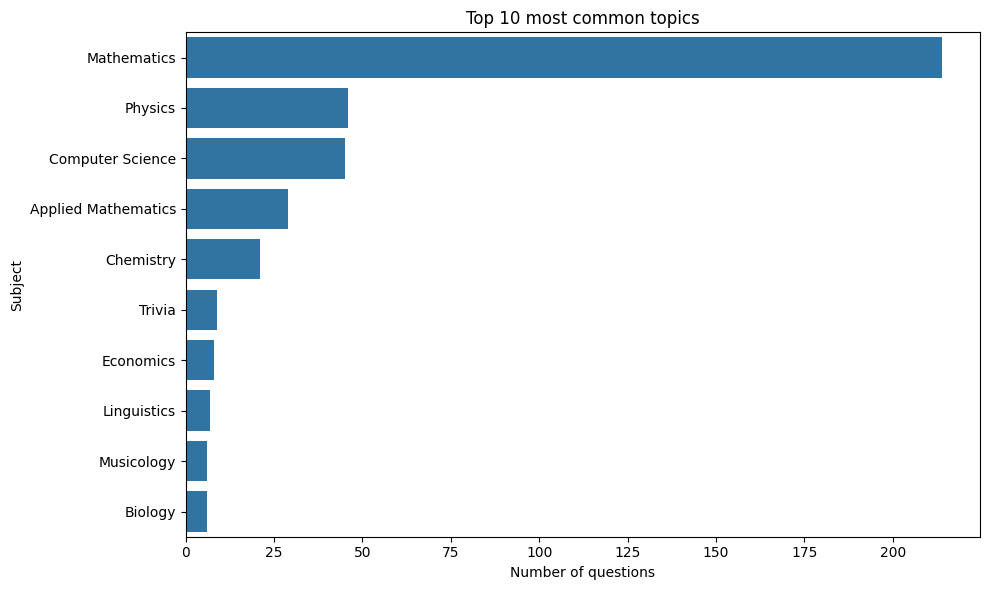

In [16]:
subject_counts = df['raw_subject'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.values, y=subject_counts.index)
plt.title("Top 10 most common topics")
plt.xlabel("Number of questions")
plt.ylabel("Subject")
plt.tight_layout()
plt.show()

~ Solution explanation: The code counts the questions for each subject and picks the top 10. Then, it makes a bar chart where longer bars show more questions for that subject. This helps you quickly see the most popular topics.

~ Interpretation: The graph displays the top 10 most frequent subjects in the questions. Each horizontal bar corresponds to a subject, and the length of the bar indicates how many questions are associated with that subject. By looking at the lengths of the bars, you can easily see which subjects are most common and which are among the top 10 but less frequent than others. For instance, "Mathematics" has the longest bar, showing it's the most common topic, while "Biology" has a much shorter bar, indicating it's among the least frequent in the top 10. This visual makes it straightforward to understand the distribution of the most popular subjects.

# Part 2: Model Answer Extraction and Evaluation 

### Datasets: 
● answers_aether.csv   
● answers_avalon.csv   
● answers_fenrir.csv   

Each dataset contains answers from different LLMs, structured as follows:   
● question_id: Matches the id from difficult_qa.csv.   
● raw_answer: The unstructured answer text from the LLM.  

### Extraction Task 
Automatically extract from each raw_answer:  
● Rationale/Explanation   
● Final Answer   
● Confidence Score (0-100%)  

In [ ]:
import pandas as pd
import re

EXPLANATION_KEYS = ['Explanation', 'Reasons', 'Analysis', 'Rationale', 'Reasoning']
ANSWER_KEYS = ['Final Answer', 'Answer', 'Response', 'Solution', 'Conclusion']
CONFIDENCE_KEYS = ['Confidence', 'Confidence Score', 'Confidence Level', 'Certainty']

def extract_sections(raw_text):
    explanation = None
    final_answer = None
    confidence = None

    text = raw_text.strip()

    for key in EXPLANATION_KEYS:
        match = re.search(fr'{key}[:\-]\s*(.+?)(?=({"|".join(ANSWER_KEYS + CONFIDENCE_KEYS)}):)', text, re.IGNORECASE | re.DOTALL)
        if match:
            explanation = match.group(1).strip()
            break

    for key in ANSWER_KEYS:
        match = re.search(fr'{key}[:\-]\s*(.+?)(?=({"|".join(CONFIDENCE_KEYS)}):|$)', text, re.IGNORECASE | re.DOTALL)
        if match:
            final_answer = match.group(1).strip()
            break

    for key in CONFIDENCE_KEYS:
        match = re.search(fr'{key}[:\-]?\s*(\d{{1,3}})', text, re.IGNORECASE)
        if match:
            score = int(match.group(1))
            if 0 <= score <= 100:
                confidence = score
            break

    if not explanation or not final_answer or confidence is None:
        return None  

    return {
        'explanation': explanation,
        'final_answer': final_answer,
        'confidence': confidence
    }

def process_file(file_path):
    df = pd.read_csv(file_path)
    results = []

    for _, row in df.iterrows():
        extracted = extract_sections(row['raw_answer'])
        if extracted:
            results.append({
                'question_id': row['question_id'],
                'explanation': extracted['explanation'],
                'final_answer': extracted['final_answer'],
                'confidence': extracted['confidence']
            })

    return pd.DataFrame(results)

files = ['data/answers_aether.csv', 'data/answers_avalon.csv', 'data/answers_fenrir.csv']
final_results = []

for file in files:
    df_cleaned = process_file(file)
    model_name = file.split('/')[-1].replace('answers_', '').replace('.csv', '')
    df_cleaned['model_name'] = model_name
    final_results.append(df_cleaned)

final_df = pd.concat(final_results, ignore_index=True)
final_df.to_csv("dataOut/extracted_answers.csv", index=False)
print("\nThe first 10 answers extracted:\n")
print(final_df.head(10))


The first 10 answers extracted:

   question_id                                        explanation  \
0            5  The correct option involves assuming that the ...   
1            9  To find the largest number of components of th...   
2           10  To find the minimum value of n, we first recog...   
3           16  To find the first two non-zero digits of the d...   
4           22  None of the families mentioned are insects typ...   
5           26  To find the flow speed at which the pressure a...   
6           27  Albert Einstein's 1905 paper on Brownian motio...   
7           35  Andre Vernault was a puppeteer. As a puppeteer...   
8           37  The rank of the Choi matrix of a quantum chann...   
9           40  This approach of using undergraduate rankings ...   

           final_answer  confidence model_name  
0         [ (a AND c) ]         100     aether  
1                     3         100     aether  
2                    31         100     aether  
3         

~ Solution explanation: To solve this task, I used regular expressions to automatically extract the explanation, final answer, and confidence score from the raw text responses. Since the LLMs often follow different formats and wording, I created lists of common alternative terms for each section (like "Rationale", "Solution", or "Confidence Level"). The extraction logic scans the text for these indicators and pulls out the most likely matching segments. I also added checks to skip malformed or incomplete entries. This approach is simple and works well without needing any advanced machine learning model.

### Evaluation Task 

### 1. Accuracy: 

In [ ]:
extracted_df = pd.read_csv('dataOut/extracted_answers.csv')
ground_truth_df = pd.read_csv('data/difficult_qa.csv')

ground_truth_df = ground_truth_df.rename(columns={'id': 'question_id', 'ground_truth_answer': 'correct_answer'})
merged_df = pd.merge(extracted_df, ground_truth_df, on='question_id')

def normalize_answer(ans):
    return str(ans).strip().lower()

merged_df['final_answer_norm'] = merged_df['final_answer'].apply(normalize_answer)
merged_df['correct_answer_norm'] = merged_df['correct_answer'].apply(normalize_answer)
merged_df['is_exact_match'] = merged_df['final_answer_norm'] == merged_df['correct_answer_norm']

def word_overlap(a, b):
    set_a = set(a.split())
    set_b = set(b.split())
    if not set_a or not set_b:
        return 0.0
    overlap = set_a.intersection(set_b)
    score = len(overlap) / len(set_a.union(set_b))
    return score

merged_df['word_overlap_score'] = merged_df.apply(lambda row: word_overlap(row['final_answer_norm'], row['correct_answer_norm']), axis=1)

THRESHOLD = 0.5
merged_df['is_fuzzy_match'] = merged_df['word_overlap_score'] >= THRESHOLD

grouped = merged_df.groupby('model_name').agg(
    exact_accuracy = ('is_exact_match', 'mean'),
    fuzzy_accuracy = ('is_fuzzy_match', 'mean')
)

for model_name, row in grouped.iterrows():
    print(f"Model: {model_name.upper()}")
    print(f"-Exact Match Accuracy: {row['exact_accuracy']:.2%}")
    print(f"-Fuzzy Match Accuracy (word overlap ≥ {THRESHOLD}): {row['fuzzy_accuracy']:.2%}")
    print()

Model: AETHER
-Exact Match Accuracy: 6.82%
-Fuzzy Match Accuracy (word overlap ≥ 0.5): 6.82%

Model: AVALON
-Exact Match Accuracy: 10.28%
-Fuzzy Match Accuracy (word overlap ≥ 0.5): 15.89%

Model: FENRIR
-Exact Match Accuracy: 34.94%
-Fuzzy Match Accuracy (word overlap ≥ 0.5): 38.55%



~ Solution explanation: I normalized answers to lowercase and trimmed spaces. Then I checked exact matches and also used word overlap to catch partly matching answers, overlap ≥ 50%.
~ Interpretation: Exact match is low, but fuzzy match is higher, meaning some answers are correct but phrased differently. For example, Avalon’s fuzzy score is much better than exact, showing it gets meaning right even if wording differs. Fenrir performs best overall, with more exact and fuzzy matches. So, exact match alone misses some correct answers. For Aether, exact and fuzzy accuracies are the same, 6.82%, meaning it didn’t produce any partially correct answers with different wording, only exact matches counted.

### 2. Calibration Error: 

In [26]:
import numpy as np

def compute_ece(df, n_bins=10):
    bins = np.linspace(0, 100, n_bins + 1)
    bin_indices = np.digitize(df['confidence'], bins, right=True)
    n = len(df)
    ece = 0.0

    for i in range(1, len(bins)):
        bin_mask = bin_indices == i
        bin_size = bin_mask.sum()
        if bin_size == 0:
            continue
        avg_conf = df.loc[bin_mask, 'confidence'].mean() / 100  
        acc = df.loc[bin_mask, 'is_exact_match'].mean()
        ece += (bin_size / n) * abs(avg_conf - acc)
    
    return ece

model_groups = merged_df.groupby('model_name')

for model_name, group in model_groups:
    ece = compute_ece(group)
    print(f"Model: {model_name.upper()}")
    print(f"-Expected Calibration Error: {ece:.4f}")
    print()

Model: AETHER
-Expected Calibration Error: 0.8834

Model: AVALON
-Expected Calibration Error: 0.8264

Model: FENRIR
-Expected Calibration Error: 0.5000



~ Solution explanation: I computed the Expected Calibration Error by grouping answers by model_name, using each model’s confidence and whether the answer was correct, is_exact_match. Confidence scores were split into 10 bins, and for each bin, I compared average confidence with actual accuracy. ECE reflects how closely a model’s confidence matches its real performance.
~ Interpretation: The ECE scores show that FENRIR is the best calibrated model, ECE ~ 0.50, meaning its confidence levels are more aligned with how often it gets answers right. In contrast, AETHER, ECE ~ 0.88, and AVALON, ECE ~ 0.83, show poor calibration, they tend to be overconfident or underconfident. A lower ECE means more trustworthy confidence estimates from the model.

### 3. Rationale Similarity: 

In [30]:
ground_truth_df_2 = ground_truth_df.rename(columns={'id': 'question_id', 'rationale': 'ground_truth_rationale'})
merged_df_2 = pd.merge(extracted_df, ground_truth_df_2[['question_id', 'ground_truth_rationale']], on='question_id')

def word_overlap(a, b):
    set_a = set(str(a).lower().split())
    set_b = set(str(b).lower().split())
    if not set_a or not set_b:
        return 0.0
    return len(set_a.intersection(set_b)) / len(set_a.union(set_b))

merged_df_2['rationale_similarity'] = merged_df_2.apply(lambda row: word_overlap(row['explanation'], row['ground_truth_rationale']), axis=1)
grouped = merged_df_2.groupby('model_name')['rationale_similarity'].mean()

for model_name, score in grouped.items():
    print(f"Model: {model_name.upper()}")
    print(f"-Average Rationale Similarity: {score:.2%}\n")

Model: AETHER
-Average Rationale Similarity: 10.25%

Model: AVALON
-Average Rationale Similarity: 10.90%

Model: FENRIR
-Average Rationale Similarity: 12.47%



~ Solution explanation: For each model, I compared its extracted explanation to the ground truth rationale provided in the dataset. I used a simple word overlap metric, which measures how many words are shared between the model’s explanation and the correct rationale, relative to the total unique words in both texts. Then, I averaged this similarity score across all questions for each model to see how closely their reasoning matches the ground truth.
~ Interpretation: All three models show low rationale similarity scores, with FENRIR performing best at around 12.5%, followed by AVALON at 11%, and AETHER at 10%. This indicates that while the models sometimes share common words with the ground truth rationale, their explanations generally differ significantly from the expected reasoning.